In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('../Database/kp_classify_filtered.csv')
df.head()

,match,image_tag,pos,point_x,point_y,size,angle,response,octave,blur
0,0,S6268S05,right-side,49,169,37.200001,332.101624,0.000561,1,15.741389
1,0,S6589S05,right-side,45,78,37.200001,304.904633,0.000206,1,8.851910
2,0,S6268S05,right-side,61,110,44.640003,354.250458,0.000638,2,15.741389
3,0,S6589S05,right-side,41,145,31.000000,8.945118,0.000735,0,8.851910
4,0,S6268S05,left-side,62,88,37.200001,175.376465,0.001307,1,15.741389


In [4]:
# dividing the datasets into two parts i.e. training datasets and test datasets
mapping = {'right-side': 0, 'left-side': 1, 'bottom': 2, 'complete': 3}
df['pos'] = df['pos'].map(mapping)

# df = df.sample(n=650000, random_state=42).reset_index(drop=True)
# df = df.drop(['angle', 'response', 'octave'], axis=1)

df = df.drop(labels=['image_tag'], axis=1)

In [5]:
correlation_matrix = df.corr()

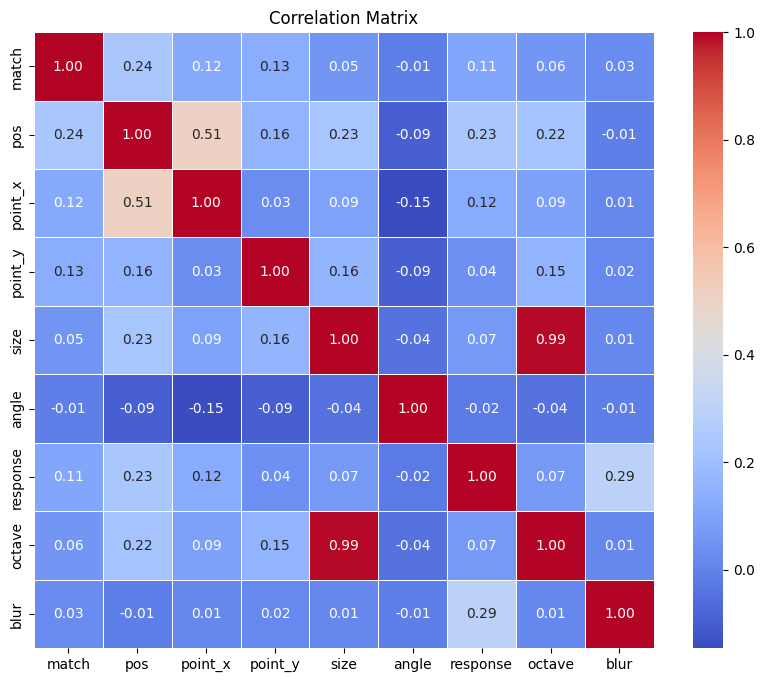

In [6]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
df.shape

(213898, 9)

In [8]:
df.shape[0]

213898

In [9]:
df_reduced = df.sample(n=df.shape[0], random_state=42).reset_index(drop=True)

In [10]:
heatmap_data_size = df_reduced.pivot_table(index='point_y', columns='point_x', values='size', aggfunc='mean')
heatmap_data_class = df_reduced.pivot_table(index='point_y', columns='point_x', values='match', aggfunc='mean')

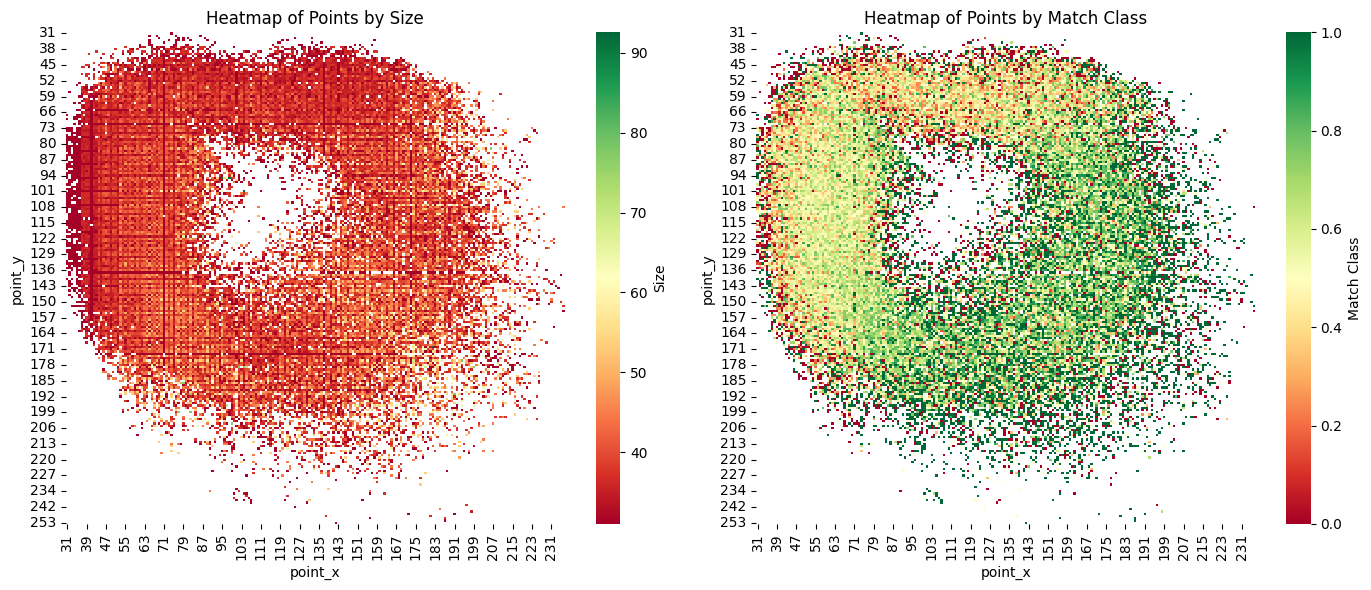

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(heatmap_data_size, cmap="RdYlGn", annot=False, fmt=".2f", cbar_kws={'label': 'Size'}, ax=ax1)
ax1.set_title('Heatmap of Points by Size')
ax1.set_xlabel('point_x')
ax1.set_ylabel('point_y')

sns.heatmap(heatmap_data_class, cmap="RdYlGn", annot=False, fmt="d", cbar_kws={'label': 'Match Class'}, ax=ax2)
ax2.set_title('Heatmap of Points by Match Class')
ax2.set_xlabel('point_x')
ax2.set_ylabel('point_y')

plt.tight_layout()
plt.show()

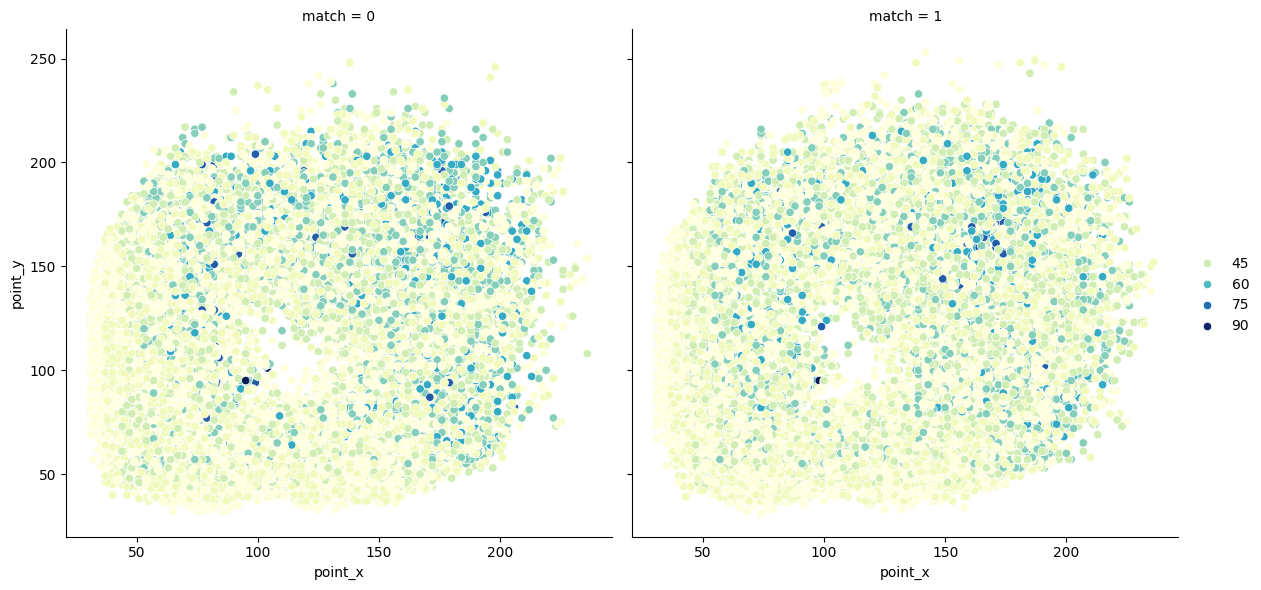

In [12]:
g = sns.FacetGrid(df_reduced, col="match", height=6, aspect=1)
g.map(sns.scatterplot, "point_x", "point_y", "size", palette="YlGnBu", sizes=(20, 200))
g.add_legend()
plt.show()

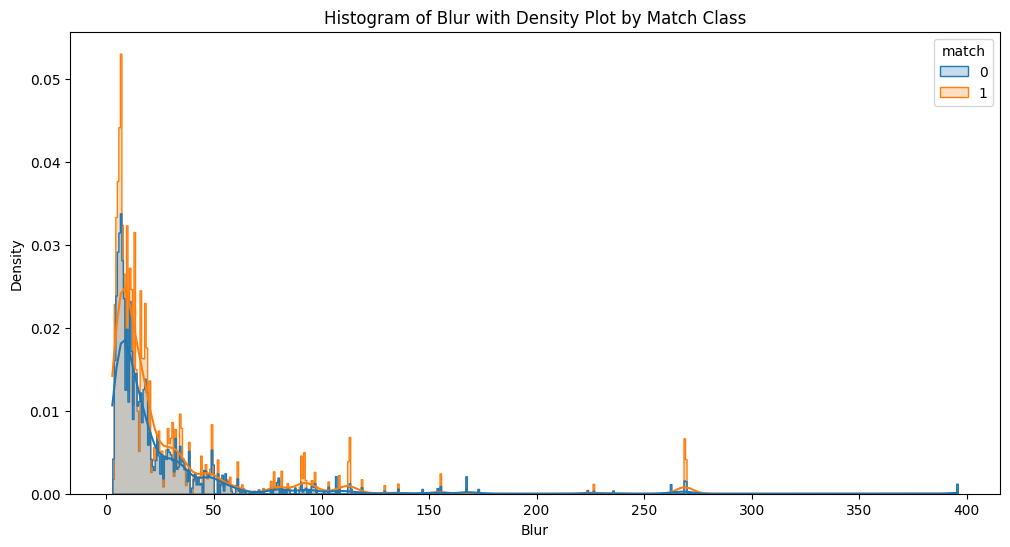

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='blur', hue='match', kde=True, element='step', stat='density')
plt.title('Histogram of Blur with Density Plot by Match Class')
plt.xlabel('Blur')
plt.ylabel('Density')
plt.show()

In [14]:
# Compute the correlation between 'size' and 'match'
correlation = df[['blur', 'match']].corr().iloc[0, 1]
print(f"Correlation between blur and match_class: {correlation:.2f}")

Correlation between blur and match_class: 0.03


In [15]:
size_class_0 = df[df['match'] == 0]['size']
size_class_1 = df[df['match'] == 1]['size']

# Perform t-test
t_stat, p_value = ttest_ind(size_class_0, size_class_1, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}")

T-statistic: -25.21, P-value: 0.000
